In [18]:
import math
import copy
from tqdm import tqdm

import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import plotly.offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sbemdb import SBEMDB
from cleandb import clean_db, clean_db_uct

from distance import distance
from findpath import find_path

import scipy.stats  

import import_ipynb
from FitterMod import Fitter

In [19]:
db = SBEMDB() # connect to DB
db = clean_db(db)

trees Before 398
trees After 46
nodes Before 37481
nodes After 16320
nodecons Before 73994
nodecons After 32548
syncons Before 1199
syncons After 826
synapses Before 552
synapses After 535


In [20]:
db.nodetypes()

{1: 'Soma', 2: 'ExitPoint', 3: 'TreeNode', 5: 'PresynTerm', 6: 'PostsynTerm'}

In [21]:
node_ids_db = list(db.nodeDetails('tid==444 and typ=6').keys())

In [22]:
segments = pd.read_csv('segments_table.csv')
segments.head()

,segment_id,branch_id,type,depth,is_synapse,node_id,point_node_id
0,0,2137,main,0,False,2137,2137
1,0,2137,main,0,False,3477,2137
2,0,2137,main,0,False,3478,3477
3,0,2137,main,0,False,3479,3478
4,0,2137,main,0,False,3480,3479


In [23]:
x, y, z, nid = db.nodexyz()

coord_nid = {} # {(coords): nid}
nid_coord = {} # {nid: (coords)}
for i in range(len(x)):
    coord_nid[(x[i], y[i], z[i])] = nid[i]
    nid_coord[nid[i]] = (x[i], y[i], z[i])

In [24]:
x,y,z = db.segments(444)

G = nx.Graph() # graph of connected node ids given segments

for i in range(len(x) - 1):
    if not math.isnan(x[i]) and not math.isnan(x[i+1]):
        G_nid1 = coord_nid[(x[i], y[i], z[i])]
        G_nid2 = coord_nid[(x[i+1], y[i+1], z[i+1])]
        G.add_edge(G_nid1, G_nid2, distance=distance(x[i], y[i], z[i], x[i+1], y[i+1], z[i+1]))

In [25]:
segment_ids = segments['segment_id'].unique()

## Example
# starting node has same node_id and point_node_id | maybe this should be null
segments[segments['segment_id'] == segment_ids[111]]

,segment_id,branch_id,type,depth,is_synapse,node_id,point_node_id
1211,698,5846,is,7,False,7022,7022
1212,698,5846,is,7,False,7024,7022
1213,698,5846,is,7,False,7025,7024
1214,698,5846,is,7,False,7026,7025
1215,698,5846,is,7,False,7027,7026
1216,698,5846,is,7,False,7028,7027
1217,698,5846,is,7,False,7029,7028
1218,698,5846,is,7,False,7030,7029
1219,698,5846,is,7,False,7031,7030
1220,698,5846,is,7,False,7032,7031


In [26]:
'''  returns length 0
def get_length(segment_id):
    segment_nodes = segments[segments['segment_id'] == segment_id]
    start_node = segment_nodes.iloc[0]['node_id']
    end_node = segment_nodes.iloc[-1]['node_id']
    length = nx.dijkstra_path_length(G, start_node, end_node, 'distance')
    return length  # length in microns (one millionth)
'''

def get_length(segment_id):
    segment_nodes = segments[segments['segment_id'] == segment_id]
    start_node = segment_nodes.iloc[-1]['node_id']
    end_node = segment_nodes.iloc[0]['point_node_id']
    length = nx.dijkstra_path_length(G, start_node, end_node, 'distance')
    return length

In [27]:
segment_length = {segment_id: get_length(segment_id) for segment_id in segment_ids}
segment_type = {segment_id: segments[segments['segment_id'] == segment_id]['type'].values[0] for segment_id in segment_ids}
#new line above
segment_length_all = list(segment_length.values())
segment_length_main = [segment_length[seg_id] for seg_id in segments[segments['type'] == 'main']['segment_id'].unique()]
segment_length_intermediate = [segment_length[seg_id] for seg_id in segments[segments['type'] == 'is']['segment_id'].unique()]
segment_length_terminal = [segment_length[seg_id] for seg_id in segments[segments['type'] == 'ts']['segment_id'].unique()]
segment_length_root = [segment_length[seg_id] for seg_id in segments[segments['type'] == 'root']['segment_id'].unique()]

In [28]:
lower_bound = 0.05
num_fits = 10
intermediate_fit = Fitter(segment_length_intermediate, distributions = "common", verbose=True)
intermediate_fit.fit()

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


c:\users\amanda p\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:597: RuntimeWarning:

invalid value encountered in subtract




inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
---------------------
Fitted gamma distribution with error=0.011597778593481755)
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
in

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
lognorm,0.008628,596.980370,inf,-1187.960739,-5981.202220,inf
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf


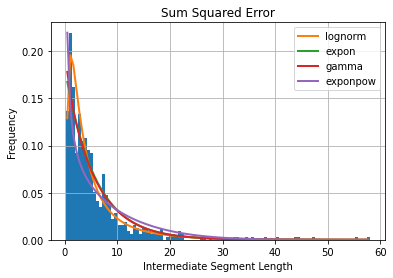

In [29]:
intermediate_fit.summary(Nbest=num_fits, seg_type = "Intermediate", method='sumsquare_error')  # fatiguelife powerlognorm exponweib johnsonb geninvgauss recipinvgauss

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
lognorm,0.008628,596.980370,inf,-1187.960739,-5981.202220,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf


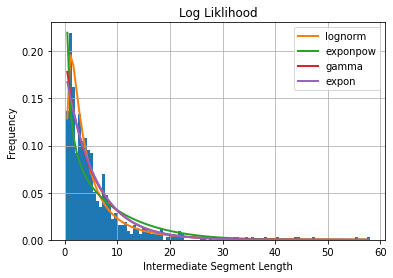

In [30]:
intermediate_fit.summary(Nbest=num_fits, seg_type = "Intermediate", method='log_lik')  # ranking changed

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf
lognorm,0.008628,596.980370,inf,-1187.960739,-5981.202220,inf


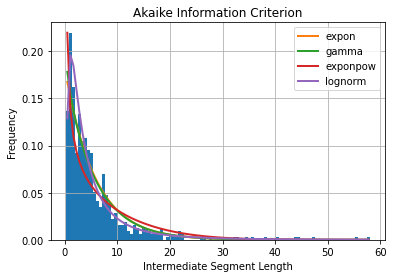

In [31]:
intermediate_fit.summary(Nbest=num_fits, seg_type = "Intermediate", method='aic')  # ranking changed

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf
lognorm,0.008628,596.980370,inf,-1187.960739,-5981.202220,inf


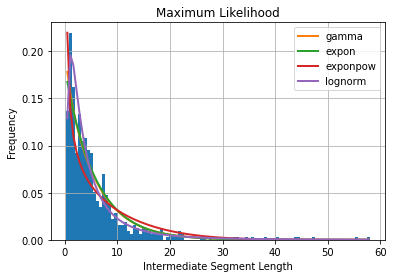

In [32]:
intermediate_fit.summary(Nbest=num_fits, seg_type = "Intermediate", method='max_lik')  #

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
lognorm,0.008628,596.980370,inf,-1187.960739,-5981.202220,inf
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf


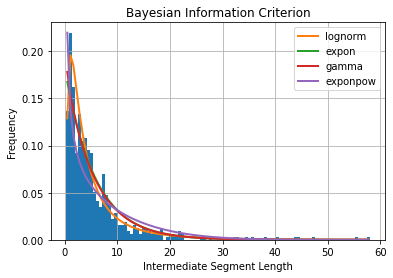

In [33]:
intermediate_fit.summary(Nbest=num_fits, seg_type = "Intermediate", method='bic')  #fatiguelife powerlognorm exponweib johnsonsb recipinvgauss geninvgauss

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
gamma,0.011598,676.754806,inf,-1347.509612,-5820.558376,inf
expon,0.011266,683.337737,inf,-1362.675473,-5842.614095,inf
exponpow,0.026895,641.831402,inf,-1277.662804,-5363.827222,inf


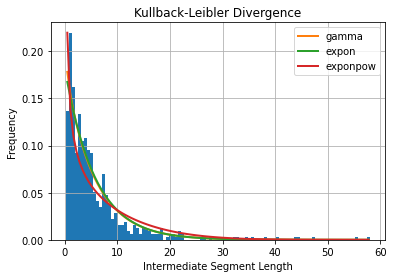

In [34]:
intermediate_fit.summary(Nbest=3, seg_type = "Intermediate", method='kl_div') # no result

In [35]:
terminal_fit = Fitter(segment_length_terminal, distributions = "common", verbose=False)
#terminal_fit._set_xmin(lower_bound)
terminal_fit.fit()

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


c:\users\amanda p\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\optimize.py:597: RuntimeWarning:

invalid value encountered in subtract



inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
lognorm,0.002485,737.849632,inf,-1469.699265,-9934.329777,inf
expon,0.096587,1341.880549,inf,-2679.761099,-7064.023847,inf
gamma,0.166456,2277.131411,inf,-4548.262823,-6629.543128,inf
exponpow,0.211196,514.636399,inf,-1023.272799,-6442.434392,inf


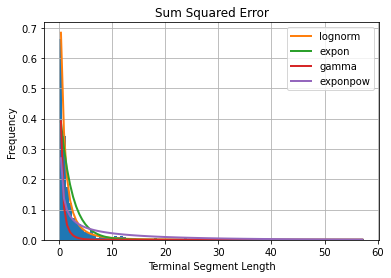

In [36]:
terminal_fit.summary(Nbest=num_fits, seg_type = "Terminal", method='sumsquare_error')  # halfcauchy kappa3 foldcauchy burr12 f beta prime loglaplace

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
exponpow,0.211196,514.636399,inf,-1023.272799,-6442.434392,inf
lognorm,0.002485,737.849632,inf,-1469.699265,-9934.329777,inf
expon,0.096587,1341.880549,inf,-2679.761099,-7064.023847,inf
gamma,0.166456,2277.131411,inf,-4548.262823,-6629.543128,inf


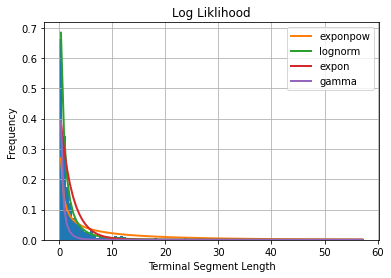

In [37]:
terminal_fit.summary(Nbest=num_fits, seg_type = "Terminal", method='log_lik')  # (-inf) norm crystalball

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
gamma,0.166456,2277.131411,inf,-4548.262823,-6629.543128,inf
expon,0.096587,1341.880549,inf,-2679.761099,-7064.023847,inf
exponpow,0.211196,514.636399,inf,-1023.272799,-6442.434392,inf
lognorm,0.002485,737.849632,inf,-1469.699265,-9934.329777,inf


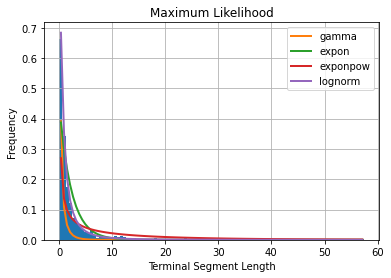

In [38]:
terminal_fit.summary(Nbest=num_fits, seg_type = "Terminal", method='max_lik')  # no result

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
lognorm,0.002485,737.849632,inf,-1469.699265,-9934.329777,inf
expon,0.096587,1341.880549,inf,-2679.761099,-7064.023847,inf
gamma,0.166456,2277.131411,inf,-4548.262823,-6629.543128,inf
exponpow,0.211196,514.636399,inf,-1023.272799,-6442.434392,inf


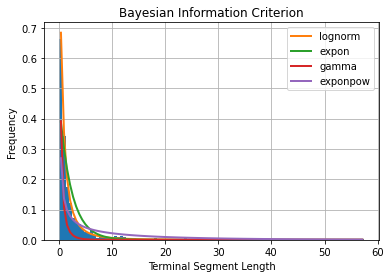

In [39]:
terminal_fit.summary(Nbest=num_fits, seg_type = "Terminal", method='bic')  # halfcauchy kappa3 foldcauchy loglaplace burr12 f betaprime genpareto lomax burr

,sumsquare_error,log_lik,max_lik,aic,bic,kl_div
gamma,0.166456,2277.131411,inf,-4548.262823,-6629.543128,inf
expon,0.096587,1341.880549,inf,-2679.761099,-7064.023847,inf
exponpow,0.211196,514.636399,inf,-1023.272799,-6442.434392,inf
lognorm,0.002485,737.849632,inf,-1469.699265,-9934.329777,inf


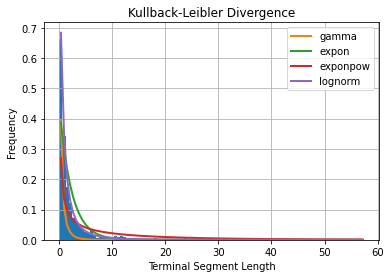

In [40]:
terminal_fit.summary(Nbest=num_fits, seg_type = "Terminal", method='kl_div')  # (-inf) alpha nct ncf nakagami